# Movie Ratings Project

## About the project

This project is about a company providing fake movie ratings to increase to viewers interest of watching the movie. For this reason we will call the cheating company `Fake company` and the rest of the companies offering movie ratings will be called `Company1`, `Company2` and `Company3`.

The goal of the project is to prove, that the Fake company is manipulating the ratings by slightly increasing the ratings of the movies in order their customer to be more interested in buying tickets for the movie.

## About the data

We have 2 csv files as a data source.

- `fake-company.csv` - contains data for the Fake company movies ratings
- `other-companies.csv` - contains data for the rest of the companies movies ratings

---

`fake-company.csv`

Column | Definiton
--- | ---------
MOVIE | The name of the movie and the release year
STARS | Number of stars presented on the website (rounded Rating value)
RATING | The rating of the movie, which the Fake company is providing to their customers. On a scale 1-5
RATING_COUNT | The number of users who rated the movie

`other-companies.csv`

Column | Definition
--- | -----------
MOVIE | The name of the movie and the release year
Company1_RATING | The movie rating provided by Company1 movie critics. On a scale 1-100
Company1_USER_RATING | The movie rating provided by Company1 users. On a scale 1-100
Company2_RATING | The movie rating provided by Company2 movie critics. On a scale 1-100
Company2_USER_RATING | The movie rating provided by Company2 users. On a scale 1-10
Company2_USER_RATING_COUNT | The number of users from Company2 who rated the movie
Company3_RATING | The movie rating provided by Company3 movie critics. On a scale 1-10
Company3_USER_RATING_COUNT | The number of users from Company3 who rated the movie

---

_Additional Notes:_

- _The different companies are providing ratings on different scales, sometimes even within the company. For example 1-5, 1-10, 1-100_
- _Within a company sometimes we have both RATING and USER_RATING. This is because the company is providing its own rating based on a movie critics and user rating based on a users who are rating the movie on the company's website_

## Solution

In [1]:
# import the libraries we are going to need for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1: Exploring Fake company Displayed Scores versus Actual User Ratings

**Preview the Fake company data**

In [2]:
fake_company = pd.read_csv("fake-company.csv")
fake_company.head()

,MOVIE,STARS,RATING,RATING_COUNT
0,Movie1 (2015),4.0,3.9,34846
1,Movie2 (2015),4.5,4.5,34390
2,Movie3 (2015),5.0,4.8,34085
3,Movie4 (2015),5.0,4.8,33538
4,Movie5 (2015),4.5,4.5,15749


**Let's explore the relationship between popularity of a movie and its rating. The plot is showing the relationship between rating and ratings count.**

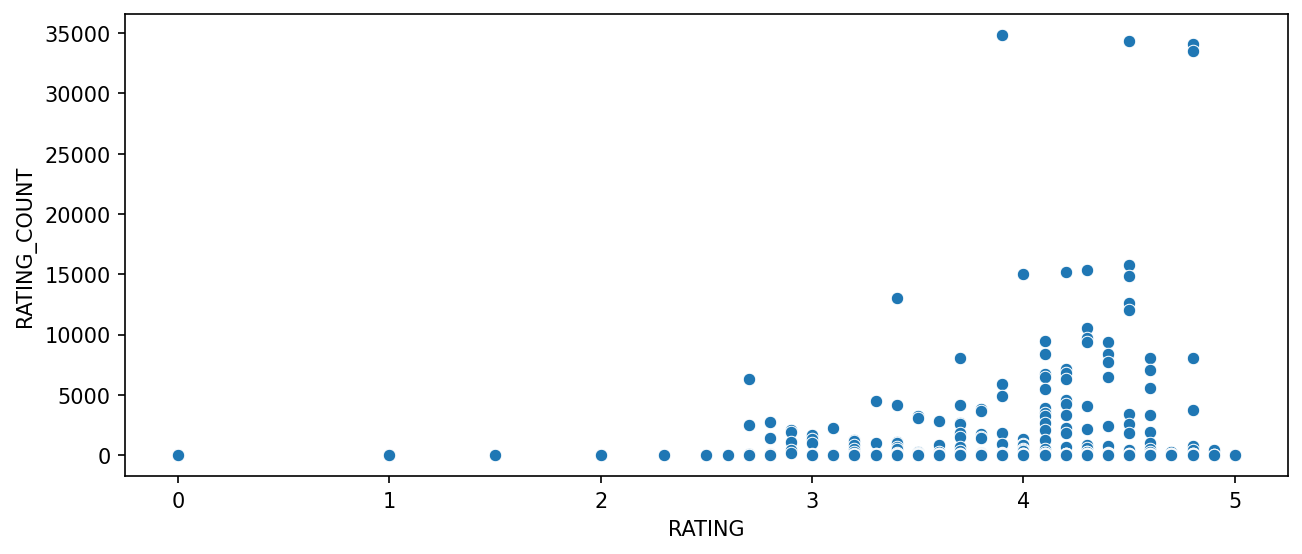

In [3]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(data=fake_company, x='RATING', y='RATING_COUNT');

**Calculation of the correlation between the columns**

In [4]:
fake_company.corr(numeric_only=True)

,STARS,RATING,RATING_COUNT
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
RATING_COUNT,0.164218,0.163764,1.000000


**Here we will extract the movie year from the title and set the year as a separate column. And then we display the number of movies for each year.**

In [5]:
fake_company['YEAR'] = fake_company['MOVIE'].apply(lambda title:title.split('(')[-1].replace(')', ''))
fake_company['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Visualize the count of movies per year with a plot**

<Axes: xlabel='YEAR', ylabel='count'>

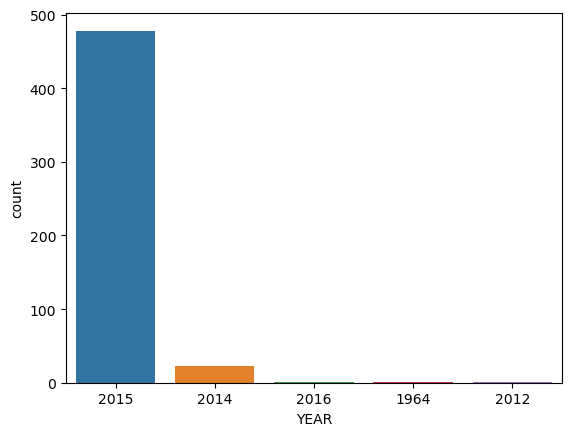

In [6]:
sns.countplot(data=fake_company, x='YEAR')

**Display the 10 movies with the highest number of ratings count**

In [7]:
fake_company.nlargest(10, 'RATING_COUNT')

,MOVIE,STARS,RATING,RATING_COUNT,YEAR
0,Movie1 (2015),4.0,3.9,34846,2015
1,Movie2 (2015),4.5,4.5,34390,2015
2,Movie3 (2015),5.0,4.8,34085,2015
3,Movie4 (2015),5.0,4.8,33538,2015
4,Movie5 (2015),4.5,4.5,15749,2015
5,Movie6 (2014),4.5,4.3,15337,2014
6,Movie7 (2015),4.5,4.2,15205,2015
7,Movie8 (2015),4.0,4.0,14998,2015
8,Movie9 (2015),5.0,4.5,14846,2015
9,Movie10 (2014),3.5,3.4,13055,2014


**Display how many movies have zero votes**

In [8]:
no_votes = fake_company['RATING_COUNT'] == 0 
no_votes.sum()

69

**Create DataFrame of only reviewed movies by removing any films that have zero votes.**

In [9]:
fan_reviewed = fake_company[fake_company['RATING_COUNT'] > 0]

**The Fake company is displaying the rating as stars which are rounded up. Let's visualize this difference in distributions.**

**We are displaying the distribution of ratings that are displayed (STARS) versus what the actual rating was from votes (RATING). Clip the KDEs to 0-5.**

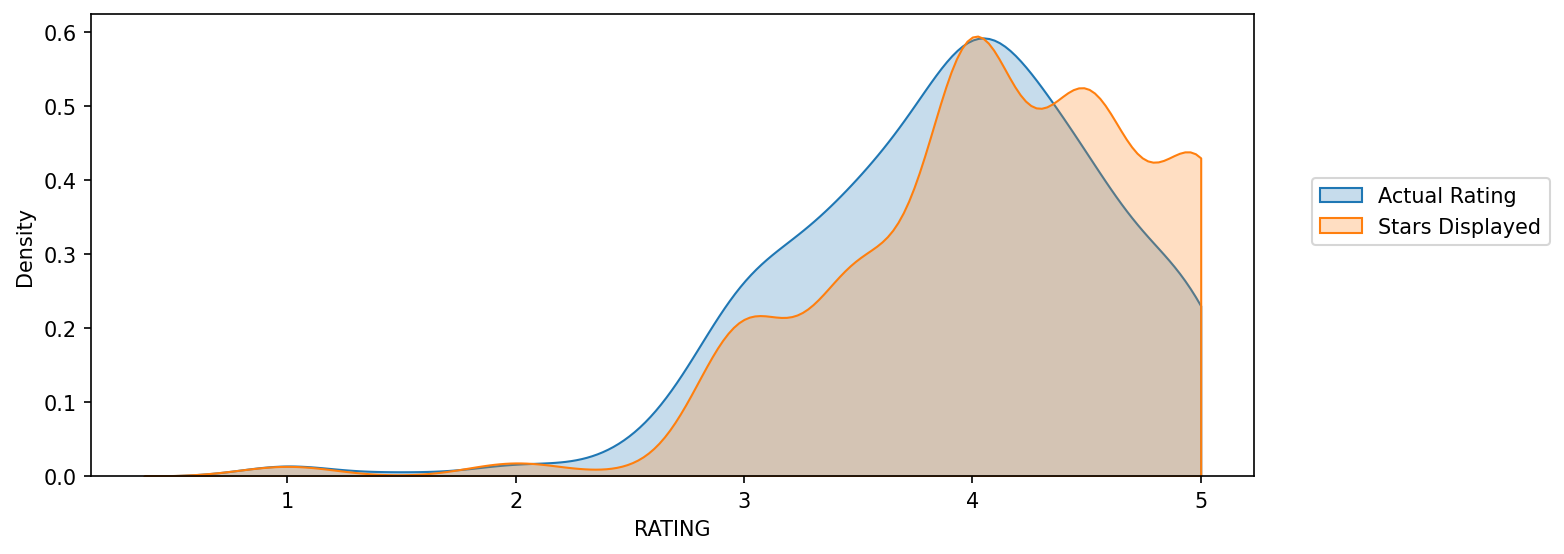

In [10]:
plt.figure(figsize=(10, 4), dpi=150)
sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0, 5], fill=True, label='Actual Rating')
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0, 5], fill=True, label='Stars Displayed')

plt.legend(loc=(1.05, 0.5))

**Let's now actually quantify this discrepancy. We will create new column which displays the difference betweem stars displayed to the customers versus the actual rating.**

In [11]:
fan_reviewed = fan_reviewed.copy()
fan_reviewed.loc[:, "STARS_DIFF"] = fan_reviewed['STARS'] - fan_reviewed['RATING']
fan_reviewed.loc[:, "STARS_DIFF"] = fan_reviewed['STARS_DIFF'].round(2)

fan_reviewed

,MOVIE,STARS,RATING,RATING_COUNT,YEAR,STARS_DIFF
0,Movie1 (2015),4.0,3.9,34846,2015,0.1
1,Movie2 (2015),4.5,4.5,34390,2015,0.0
2,Movie3 (2015),5.0,4.8,34085,2015,0.2
3,Movie4 (2015),5.0,4.8,33538,2015,0.2
4,Movie5 (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,Movie431 (2015),5.0,5.0,1,2015,0.0
431,Movie432 (2015),5.0,5.0,1,2015,0.0
432,Movie433 (2015),5.0,5.0,1,2015,0.0
433,Movie434 (2015),5.0,5.0,1,2015,0.0


**Display the number of times a certain difference occurs**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

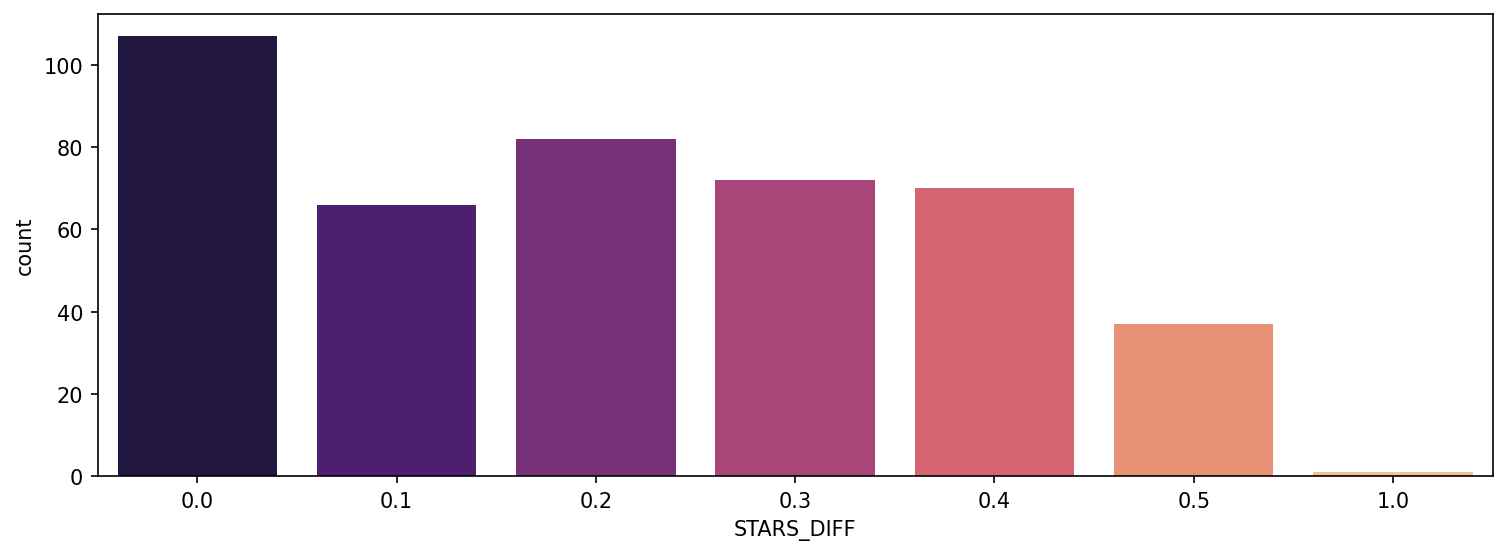

In [12]:
plt.figure(figsize=(12, 4), dpi=150)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='magma')

**We can see from the plot that one movie was displaying over a 1 star difference than its actual rating! Display which movie it was**

In [13]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,MOVIE,STARS,RATING,RATING_COUNT,YEAR,STARS_DIFF
381,Movie382 (2015),5.0,4.0,2,2015,1.0


### Part 2: Comparison of Fake company Ratings to Other Companies

**Read other companies data and preview the data frame**

In [14]:
other_companies = pd.read_csv("other-companies.csv")
other_companies.head()

,MOVIE,Company1_RATING,Company1_USER_RATING,Company2_RATING,Company2_USER_RATING,Company2_USER_RATING_COUNT,Company3_RATING,Company3_USER_RATING_COUNT
0,Movie9 (2015),74,86,66,7.1,1330,7.8,271107
1,Movie11 (2015),85,80,67,7.5,249,7.1,65709
2,Movie12 (2015),80,90,64,8.1,627,7.8,103660
3,Movie71 (2015),18,84,22,4.7,31,5.4,3136
4,Movie86 (2015),14,28,29,3.4,88,5.1,19560


### Company1

**Let's first take a look at Company1. It has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.**

(0.0, 100.0)

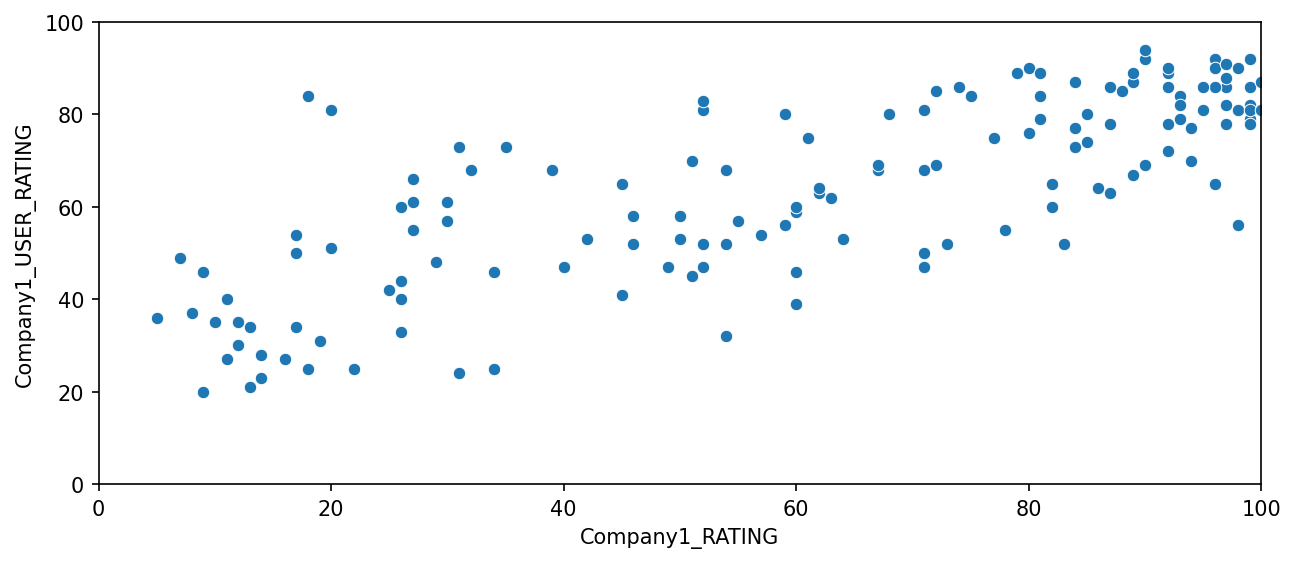

In [15]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(data=other_companies, x='Company1_RATING', y='Company1_USER_RATING')
plt.xlim(0,100)
plt.ylim(0,100)

**Let's quantify this difference by comparing the critics ratings and the user ratings for Company1.**

**We will create a new column based off the difference between critics ratings and users ratings for Company1.**

In [16]:
other_companies['Company1_Diff']  = other_companies['Company1_RATING'] - other_companies['Company1_USER_RATING']

**Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.**

In [17]:
other_companies['Company1_Diff'].apply(abs).mean()

15.095890410958905

**Plot the distribution of the differences between Company1 critics score and Company1 user score. There should be negative values in this distribution plot.**

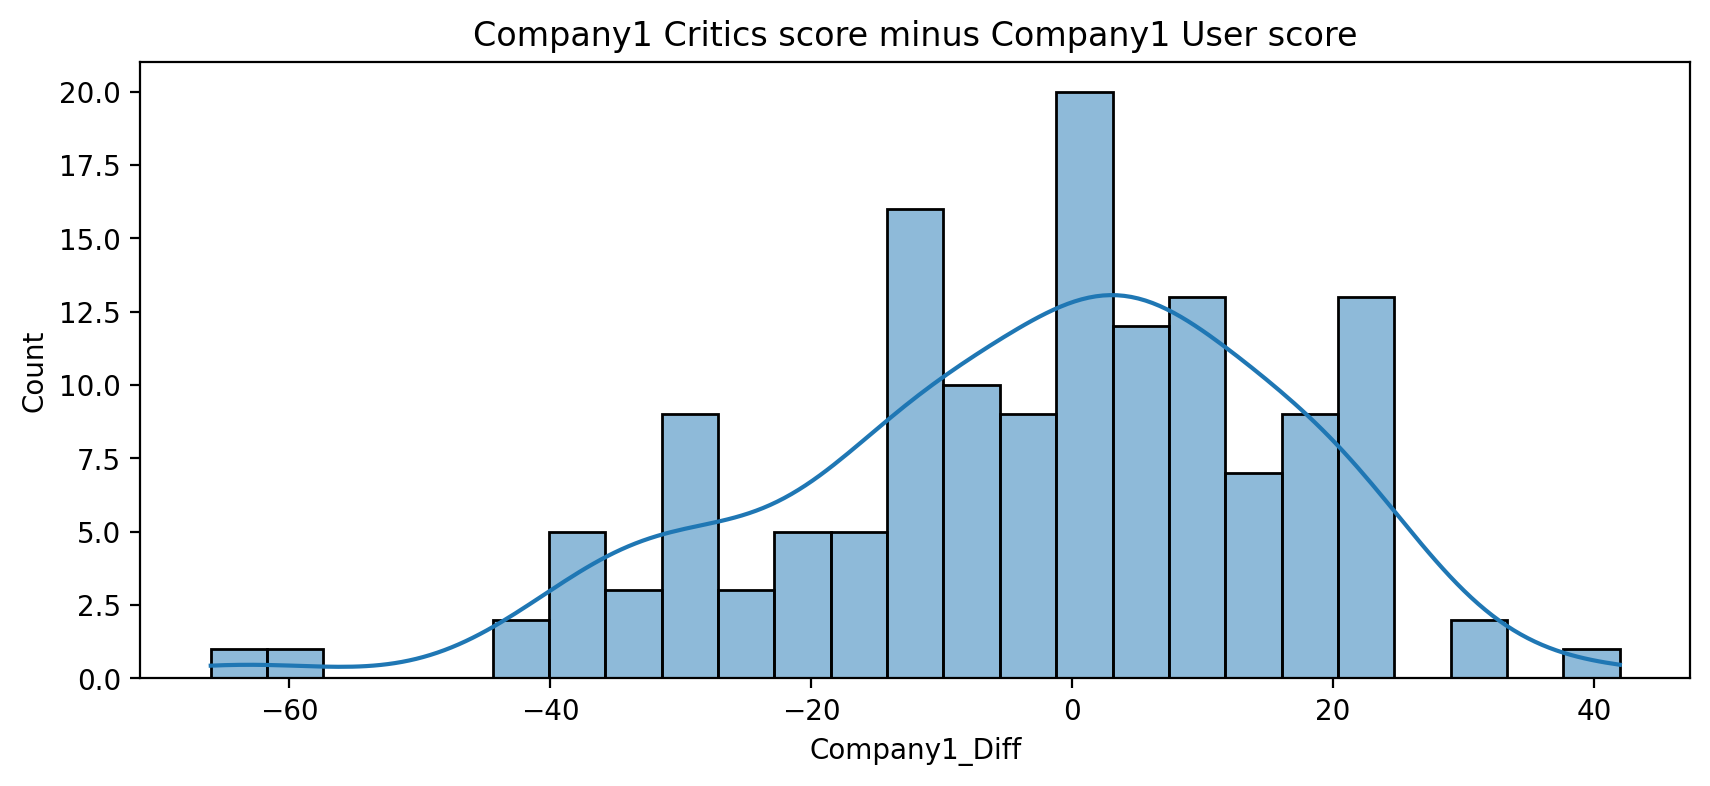

In [18]:
plt.figure(figsize=(10, 4), dpi=200)
sns.histplot(data=other_companies, x='Company1_Diff', kde=True, bins=25)
plt.title("Company1 Critics score minus Company1 User score");

**Create a distribution showing the absolute value difference between Critics and Users on Company1.**

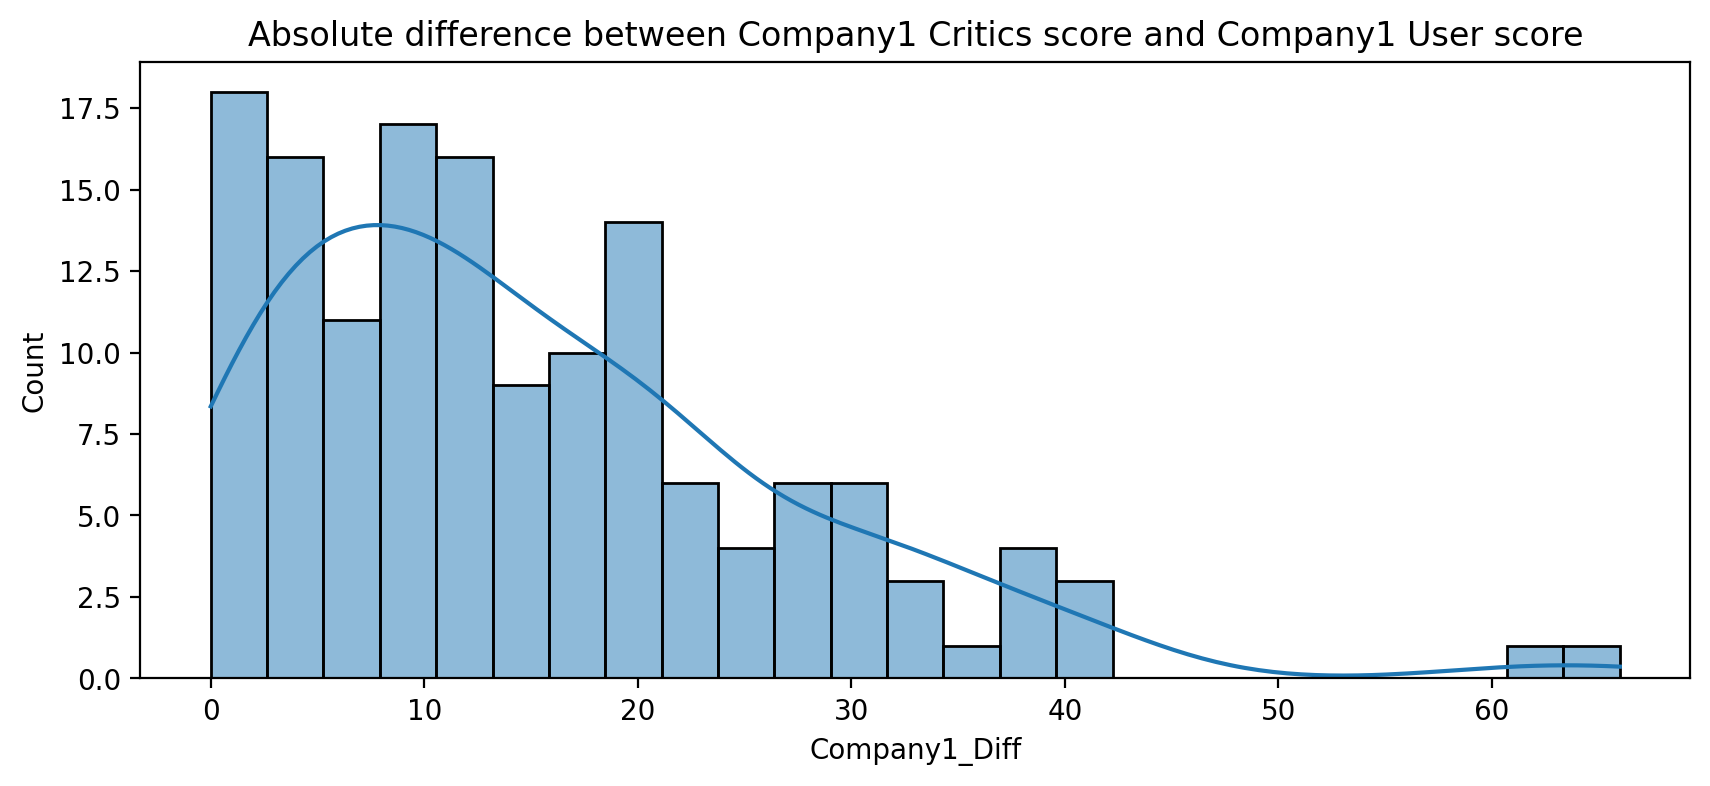

In [19]:
plt.figure(figsize=(10, 4), dpi=200)
sns.histplot(x=other_companies['Company1_Diff'].apply(abs), bins=25, kde=True)
plt.title("Absolute difference between Company1 Critics score and Company1 User score");

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest negative difference between Company1 users and critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**Display the top 5 movies users rated higher than critics on average**

In [20]:
print("Users love, but Critics hate")
other_companies.nsmallest(5, 'Company1_Diff')[['MOVIE', 'Company1_Diff']]

Users love, but Critics hate


,MOVIE,Company1_Diff
3,Movie71 (2015),-66
85,Movie94 (2015),-61
105,Movie89 (2015),-42
134,Movie58 (2015),-42
125,Movie28 (2015),-39


**Now show the top 5 movies critics scores higher than users on average.**

In [21]:
print("Critics love, but Users hate")
other_companies.nlargest(5, 'Company1_Diff')[['MOVIE', 'Company1_Diff']]

Critics love, but Users hate


,MOVIE,Company1_Diff
69,Movie115 (2014),42
112,Movie64 (2015),31
115,Movie108 (2015),31
37,Movie176 (2015),24
40,Movie116 (2015),24


### Company2

**Now let's take a quick look at the ratings from Company2. Company2 also shows an average user rating versus their critics displayed rating.**

**Display a scatterplot of the Company2 Critics rating versus User rating.**

(0.0, 10.0)

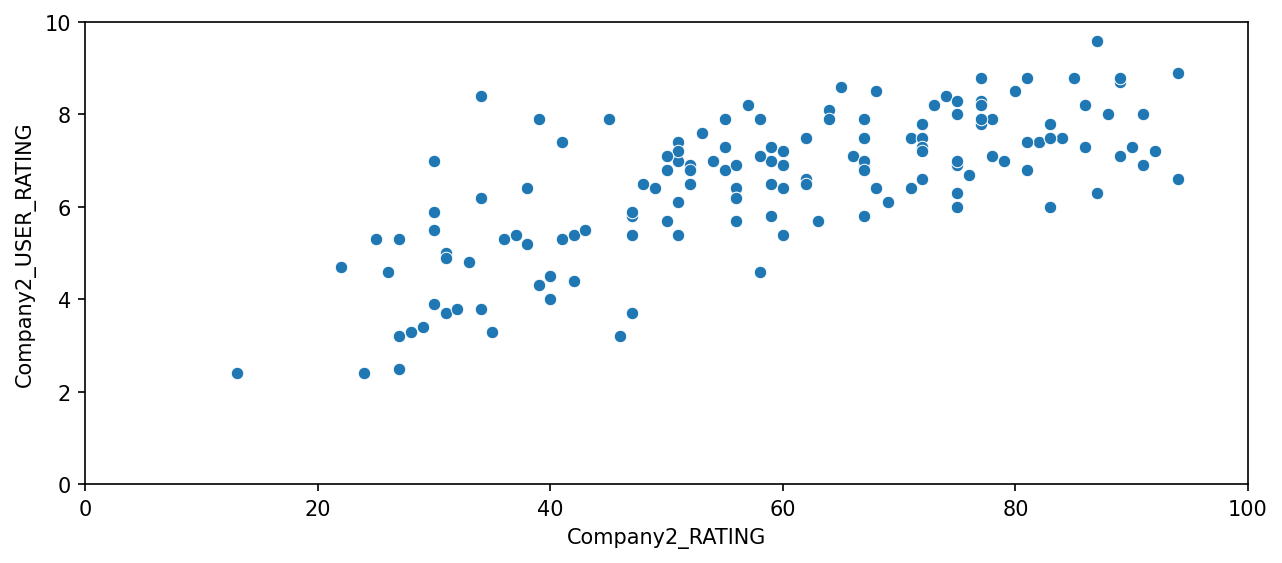

In [22]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(data=other_companies, x='Company2_RATING', y='Company2_USER_RATING')
plt.xlim(0,100)
plt.ylim(0,10)

### Company3

**Finally let's explore Company3. Notice that both Company2 and Company3 report back rating counts. Let's analyze the most popular movies.**

**Create a scatterplot for the relationship between rating counts on Company2 versus rating counts on Company3.**

<Axes: xlabel='Company2_USER_RATING_COUNT', ylabel='Company3_USER_RATING_COUNT'>

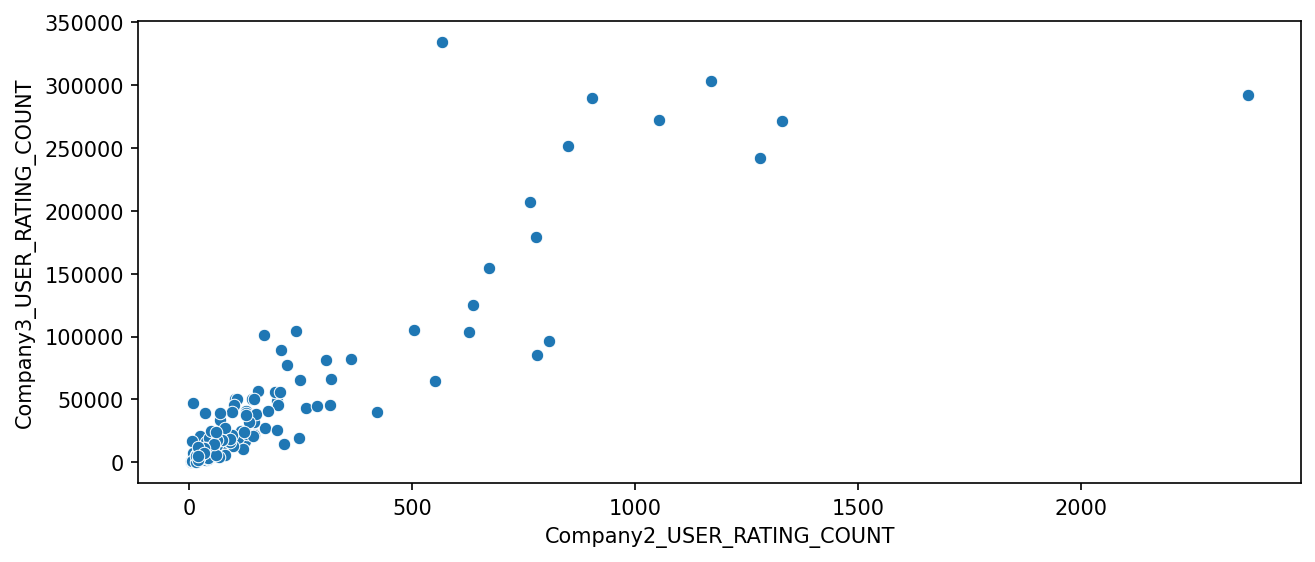

In [23]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(data=other_companies, x='Company2_USER_RATING_COUNT', y='Company3_USER_RATING_COUNT')

**Notice there are two outliers here. The first outlier with the highest rating count on Company3 only has about 500 Company2 ratings.**

**Display the movie with highest Company3 user rating count**

In [24]:
other_companies.nlargest(1, 'Company3_USER_RATING_COUNT')

,MOVIE,Company1_RATING,Company1_USER_RATING,Company2_RATING,Company2_USER_RATING,Company2_USER_RATING_COUNT,Company3_RATING,Company3_USER_RATING_COUNT,Company1_Diff
14,Movie22 (2014),90,92,73,8.2,566,8.1,334164,-2


**Display the movie with highest Company2 user rating count**

In [25]:
other_companies.nlargest(1,'Company2_USER_RATING_COUNT')

,MOVIE,Company1_RATING,Company1_USER_RATING,Company2_RATING,Company2_USER_RATING,Company2_USER_RATING_COUNT,Company3_RATING,Company3_USER_RATING_COUNT,Company1_Diff
88,Movie13 (2015),97,88,89,8.7,2375,8.3,292023,9


### Fake company scores vs. Other companies

**Finally let's begin to explore whether or not Fake company artificially displays higher ratings than warranted to boost movie ticket sales.**

**We will combine Company1 table with the other companies table. Not every movie in the Comapny1 table is in the Other companies table, since some Fake company movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so we do an inner merge to merge together both DataFrames based on the Movie columns.**

In [26]:
df = pd.merge(fake_company, other_companies, on='MOVIE', how='inner')
df.head()

,MOVIE,STARS,RATING,RATING_COUNT,YEAR,Company1_RATING,Company1_USER_RATING,Company2_RATING,Company2_USER_RATING,Company2_USER_RATING_COUNT,Company3_RATING,Company3_USER_RATING_COUNT,Company1_Diff
0,Movie1 (2015),4.0,3.9,34846,2015,25,42,46,3.2,778,4.2,179506,-17
1,Movie2 (2015),4.5,4.5,34390,2015,71,81,59,7.0,1281,7.3,241807,-10
2,Movie3 (2015),5.0,4.8,34085,2015,72,85,72,6.6,850,7.4,251856,-13
3,Movie4 (2015),5.0,4.8,33538,2015,81,84,67,6.8,764,7.4,207211,-3
4,Movie5 (2015),4.5,4.5,15749,2015,98,90,94,8.9,807,8.6,96252,8


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MOVIE                       146 non-null    object 
 1   STARS                       146 non-null    float64
 2   RATING                      146 non-null    float64
 3   RATING_COUNT                146 non-null    int64  
 4   YEAR                        146 non-null    object 
 5   Company1_RATING             146 non-null    int64  
 6   Company1_USER_RATING        146 non-null    int64  
 7   Company2_RATING             146 non-null    int64  
 8   Company2_USER_RATING        146 non-null    float64
 9   Company2_USER_RATING_COUNT  146 non-null    int64  
 10  Company3_RATING             146 non-null    float64
 11  Company3_USER_RATING_COUNT  146 non-null    int64  
 12  Company1_Diff               146 non-null    int64  
dtypes: float64(4), int64(7), object(2)


### Normalize columns to Fake company STARS and RATINGS 0-5

Notice that Company1, Company2 and Company3 don't use a score between 0-5 stars like Fake company does. In order to do a fair comparison, we need to normalize these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

Simple way to convert ratings:

100 / 20 = 5
10 / 2 = 5

In [28]:
# Dont run this cell multiple times, otherwise you keep dividing
df['Company1_Norm'] = np.round(df['Company1_RATING'] / 20, 1)
df['Company1User_Norm'] =  np.round(df['Company1_USER_RATING'] / 20, 1)

df['Company2_Norm'] =  np.round(df['Company2_RATING'] / 20, 1)
df['Company2User_Norm'] =  np.round(df['Company2_USER_RATING'] / 2, 1)

df['Company3_Norm'] = np.round(df['Company3_RATING'] / 2, 1)

In [29]:
df.head()

,MOVIE,STARS,RATING,RATING_COUNT,YEAR,Company1_RATING,Company1_USER_RATING,Company2_RATING,Company2_USER_RATING,Company2_USER_RATING_COUNT,Company3_RATING,Company3_USER_RATING_COUNT,Company1_Diff,Company1_Norm,Company1User_Norm,Company2_Norm,Company2User_Norm,Company3_Norm
0,Movie1 (2015),4.0,3.9,34846,2015,25,42,46,3.2,778,4.2,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Movie2 (2015),4.5,4.5,34390,2015,71,81,59,7.0,1281,7.3,241807,-10,3.6,4.0,3.0,3.5,3.6
2,Movie3 (2015),5.0,4.8,34085,2015,72,85,72,6.6,850,7.4,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Movie4 (2015),5.0,4.8,33538,2015,81,84,67,6.8,764,7.4,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Movie5 (2015),4.5,4.5,15749,2015,98,90,94,8.9,807,8.6,96252,8,4.9,4.5,4.7,4.4,4.3


**Now let's create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fake company table.**

In [30]:
norm_scores = df[['STARS', 'RATING', 'Company1_Norm', 'Company1User_Norm', 'Company2_Norm', 'Company2User_Norm', 'Company3_Norm']]
norm_scores.head()

,STARS,RATING,Company1_Norm,Company1User_Norm,Company2_Norm,Company2User_Norm,Company3_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites

Now the moment of truth! Does Fake company display abnormally high ratings? We already know it pushes displayed RATING higher than STARS, but are the ratings themselves higher than average?

Let's create a plot comparing the distributions of normalized ratings across all companies.

In [31]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

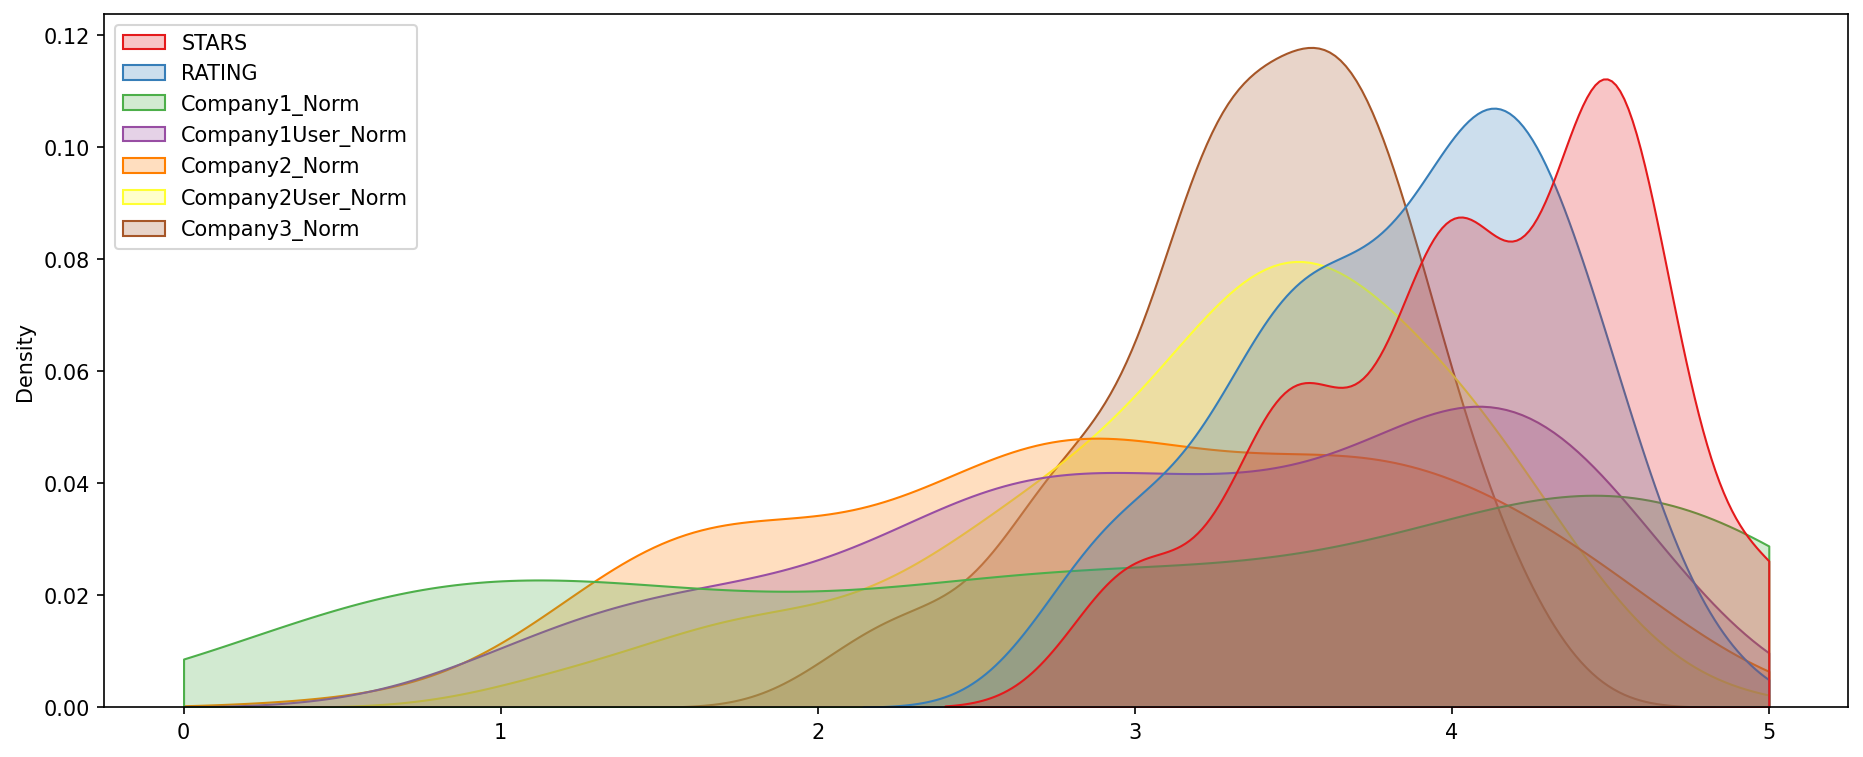

In [32]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=150)
sns.kdeplot(data=norm_scores, clip=[0,5], fill=True, palette='Set1', ax=ax)
move_legend(ax, "upper left")

Clearly Fake Company has an uneven distribution. We can also see that Company1 critics have the most uniform distribution. Let's directly compare these two.

Let's create a KDE plot that compare the distribution of Company1 critic ratings against the STARS displayed by Fake company.

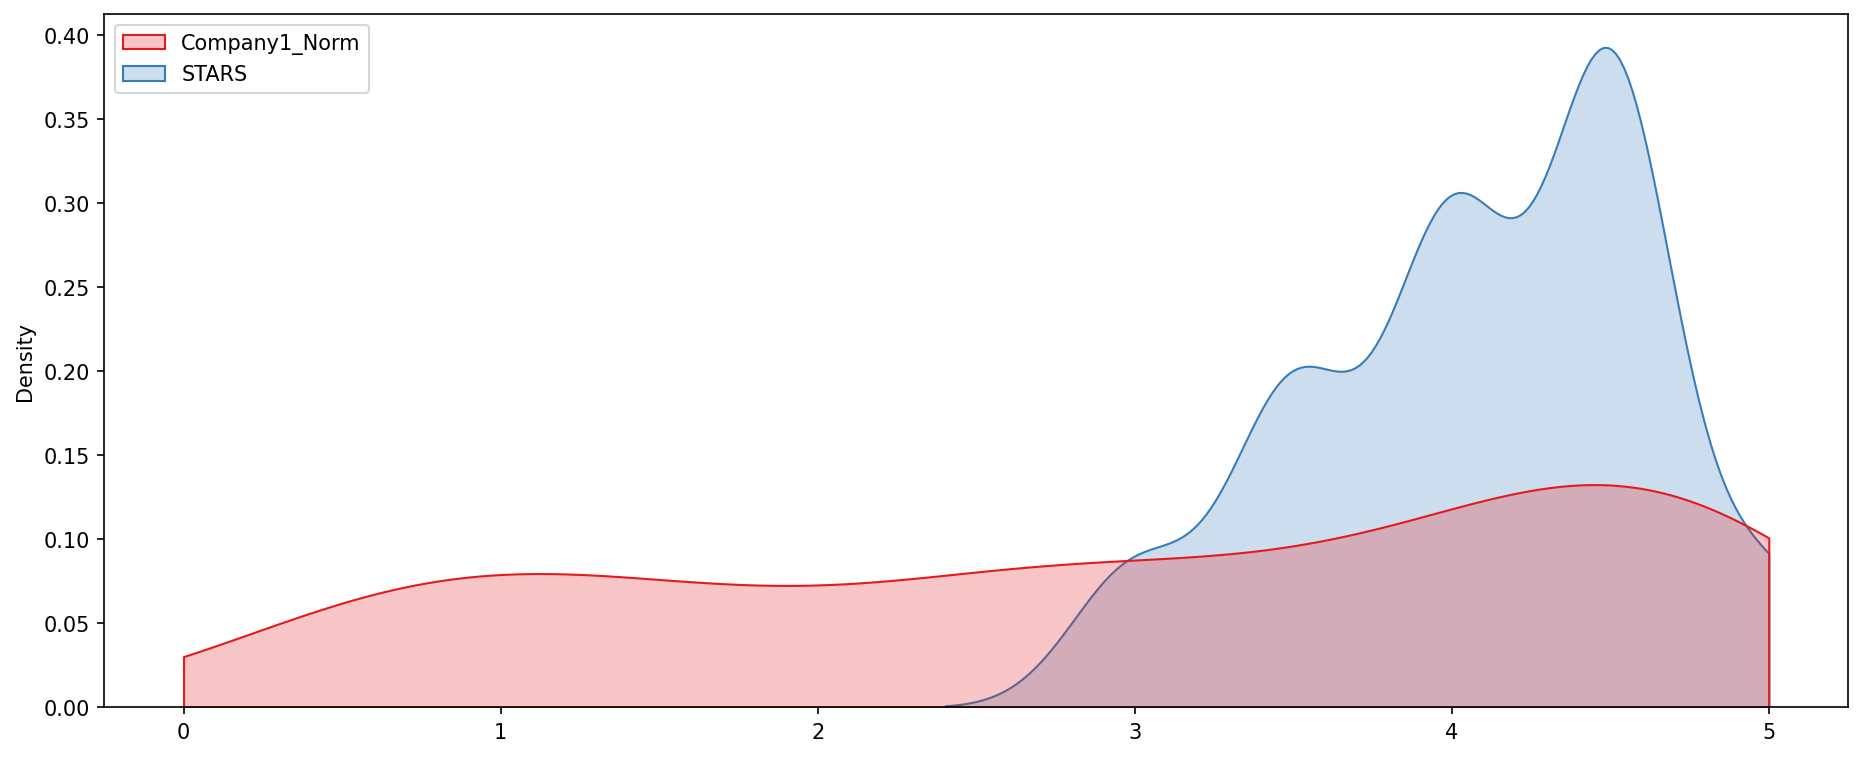

In [33]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=150)
sns.kdeplot(data=norm_scores[['Company1_Norm', 'STARS']], clip=[0, 5], fill=True, palette='Set1', ax=ax)
move_legend(ax, "upper left")

Let's also create a histplot comparing all normalized scores.

<Axes: ylabel='Count'>

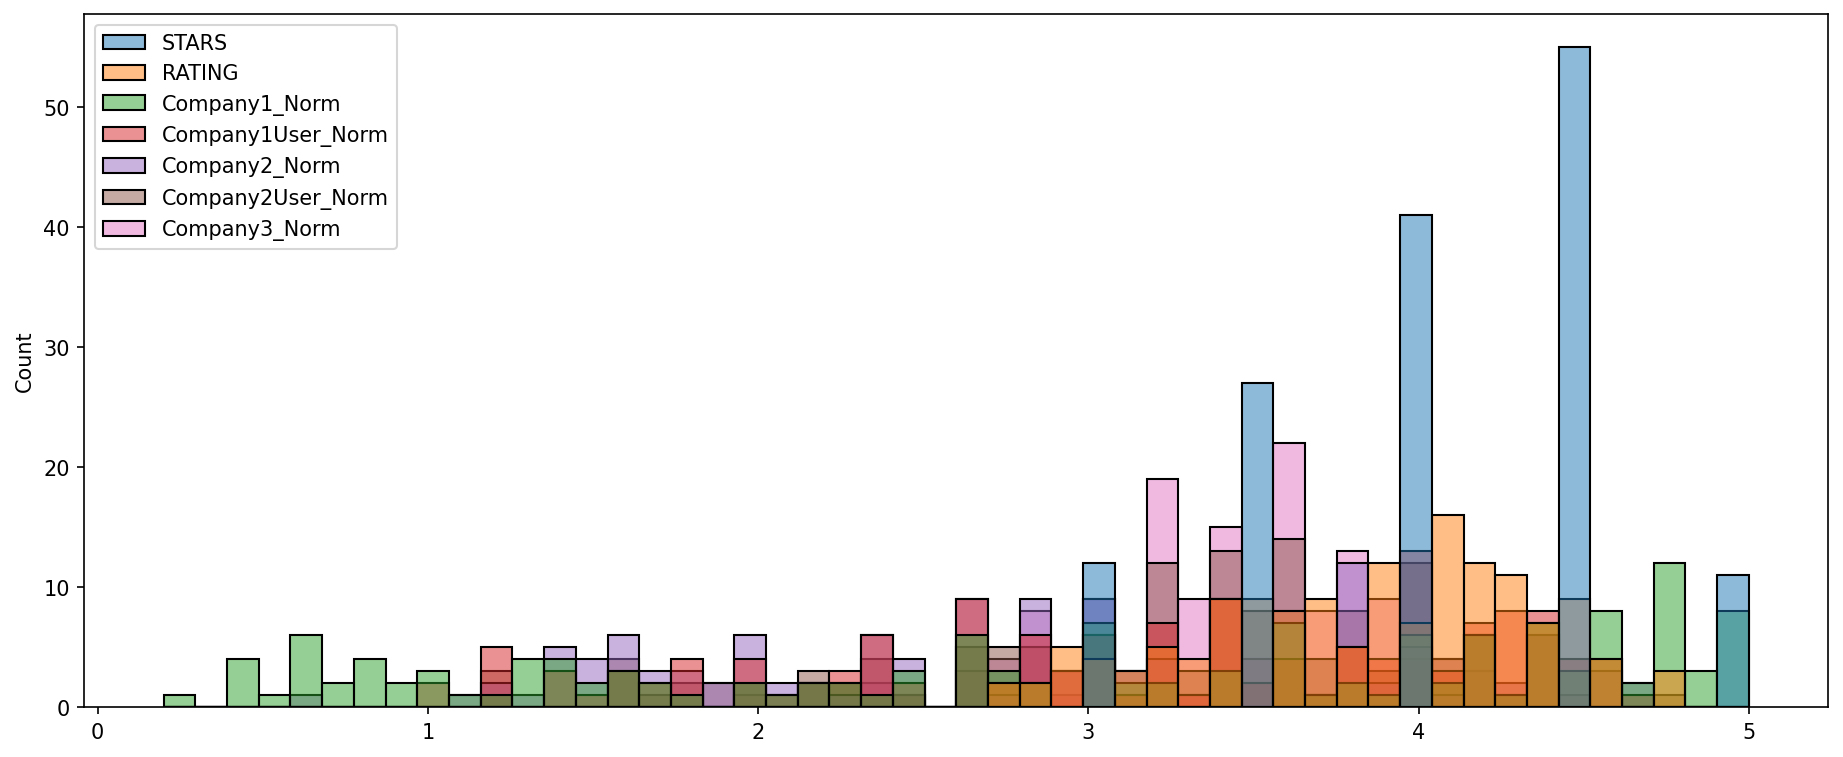

In [34]:
plt.subplots(figsize=(15, 6), dpi=150)
sns.histplot(norm_scores, bins=50)

**How are the worst movies rated across all platforms?**

Let's create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies.

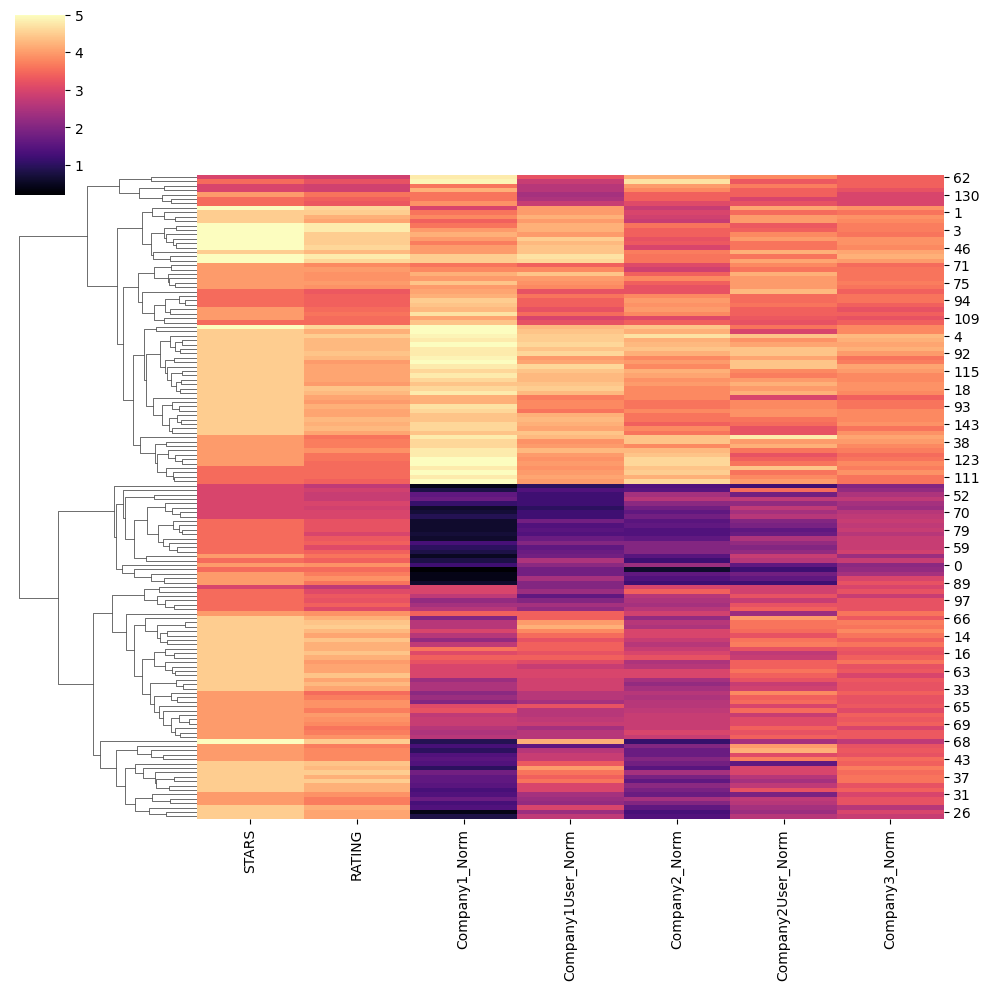

In [35]:
sns.clustermap(norm_scores, cmap='magma', col_cluster=False)

Clearly Fake company is rating movies much higher than other companies, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies.

In [36]:
norm_films = df[['STARS', 'RATING', 'Company1_Norm', 'Company1User_Norm', 'Company2_Norm', 'Company2User_Norm', 'Company3_Norm', 'MOVIE']]

In [37]:
norm_films.nsmallest(10, 'Company1_Norm')

,STARS,RATING,Company1_Norm,Company1User_Norm,Company2_Norm,Company2User_Norm,Company3_Norm,MOVIE
50,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Movie52 (2015)
26,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Movie27 (2015)
29,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Movie30 (2015)
55,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Movie57 (2015)
85,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Movie89 (2015)
51,4.0,3.6,0.5,1.8,1.5,2.8,2.3,Movie53 (2015)
78,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Movie81 (2015)
79,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Movie82 (2015)
84,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Movie88 (2015)
88,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Movie92 (2015)


Let's visualize the distribution of ratings across all companies for the top 10 worst movies.

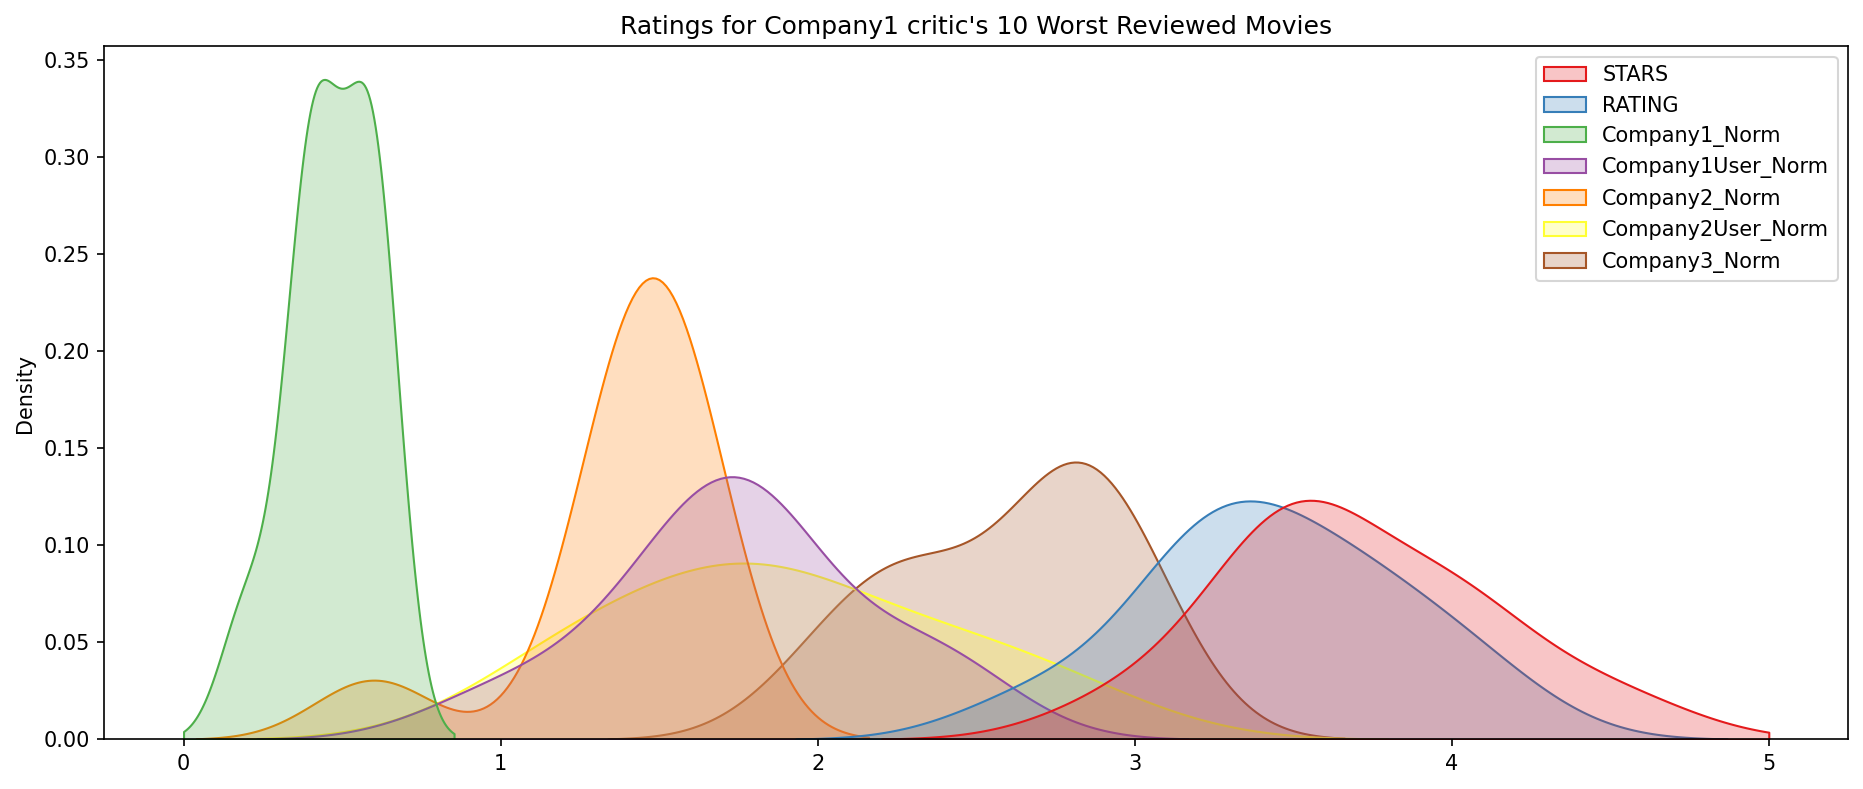

In [38]:
plt.figure(figsize=(15, 6), dpi=150)
worst_films = norm_films.nsmallest(10, 'Company1_Norm').drop('MOVIE', axis=1)
sns.kdeplot(data=worst_films, clip=[0,5], fill=True, palette='Set1')
plt.title("Ratings for Company1 critic's 10 Worst Reviewed Movies");

In [39]:
norm_films.iloc[26]

STARS                           4.5
RATING                          4.1
Company1_Norm                   0.4
Company1User_Norm               2.3
Company2_Norm                   1.3
Company2User_Norm               2.3
Company3_Norm                   3.0
MOVIE                Movie27 (2015)
Name: 26, dtype: object

In [40]:
# Sum for the Norms of the other companies (including critics + users where available)
norms_sum = 0.4 + 2.3 + 1.3 + 2.3 + 3
avg_norms_sum = norms_sum / 5
print(avg_norms_sum)

1.86


Final thoughts: Fake company is showing around 3-4 star ratings for movies that are clearly bad! Notice the biggest offender, the movie `Movie27`! Fake company is displaying 4.5 stars on their site for a movie with an average rating of 1.86 across the other companies!